In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [87]:
df = pd.read_csv("test.csv")
df.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
df.shape

(228170, 20)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228170 entries, 0 to 228169
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             228170 non-null  int64  
 1   date           228170 non-null  object 
 2   bus_route_id   228170 non-null  int64  
 3   in_out         228170 non-null  object 
 4   station_code   228170 non-null  int64  
 5   station_name   228170 non-null  object 
 6   latitude       228170 non-null  float64
 7   longitude      228170 non-null  float64
 8   6~7_ride       228170 non-null  float64
 9   7~8_ride       228170 non-null  float64
 10  8~9_ride       228170 non-null  float64
 11  9~10_ride      228170 non-null  float64
 12  10~11_ride     228170 non-null  float64
 13  11~12_ride     228170 non-null  float64
 14  6~7_takeoff    228170 non-null  float64
 15  7~8_takeoff    228170 non-null  float64
 16  8~9_takeoff    228170 non-null  float64
 17  9~10_takeoff   228170 non-nul

In [90]:
inout_count = df["in_out"].value_counts()
inout_count

시내    224439
시외      3731
Name: in_out, dtype: int64

In [91]:
inout_count.index

Index(['시내', '시외'], dtype='object')

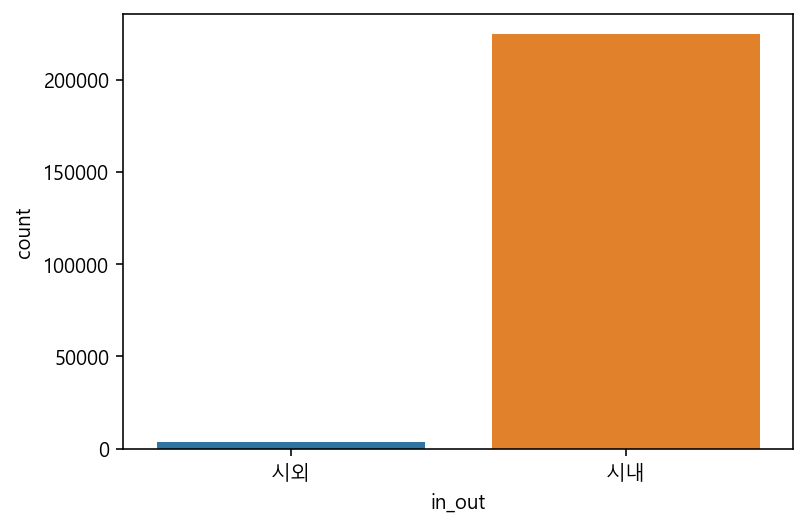

In [92]:
bb = sns.countplot(data=df, x="in_out")

for i, val in enumerate(inout_count.index):
    g.text(x=i, y=inout_count[i], s=inout_count[i])

## 시내와 시외로 파일을 구분

In [93]:
df_in = df[df["in_out"]=="시내"]
df_in.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,415428,2019-10-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,415429,2019-10-01,4270000,시내,1648,예래입구,33.25862,126.40442,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,415433,2019-10-01,4270000,시내,1943,켄싱턴리조트악근천,33.23440,126.49043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [94]:
df_out = df[df["in_out"]=="시외"]
df_out.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,415430,2019-10-01,4270000,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,2.0,0.0,1.0
8,415431,2019-10-01,4270000,시외,1662,씨에스호텔,33.24362,126.42032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## 시간대별 시내와 시외버스 이용수

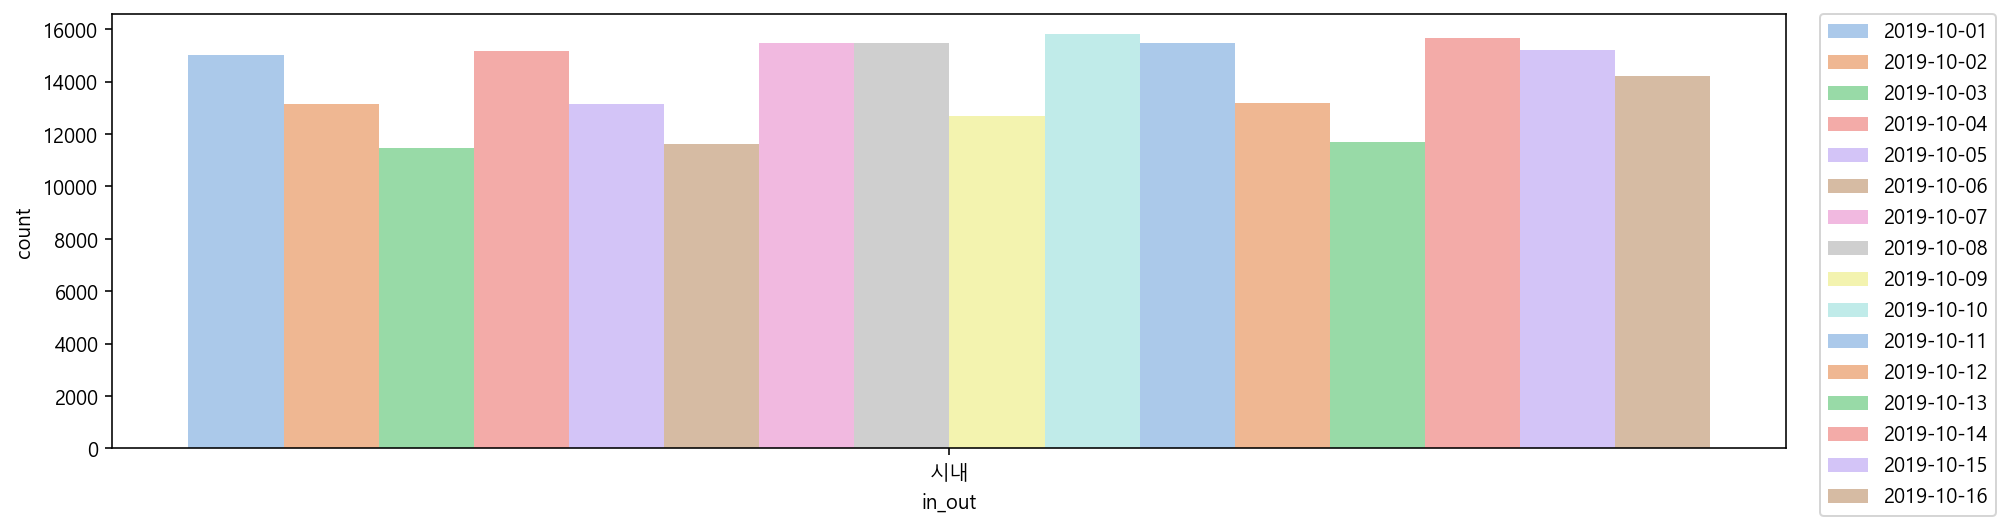

In [95]:
plt.figure(figsize=(15, 4))
g_in = sns.countplot(data=df_in, x="in_out", hue="date", palette="pastel")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

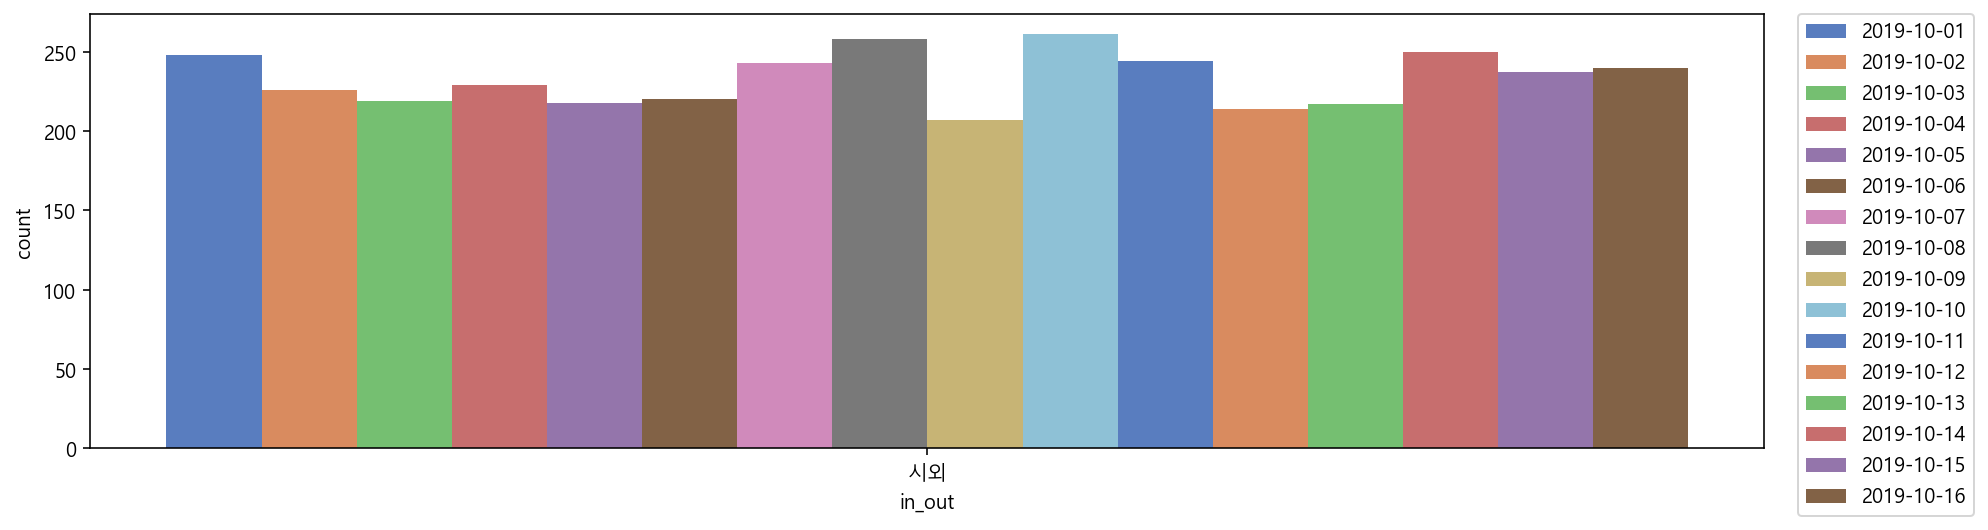

In [96]:
plt.figure(figsize=(15, 4))
g_out = sns.countplot(data=df_out, x="in_out", hue="date", palette="muted")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [97]:
df_in.head(1)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_in.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff'],
      dtype='object')

In [99]:
columns = ['station_code','latitude', 'longitude']
df_in_map = df_in[columns].copy()

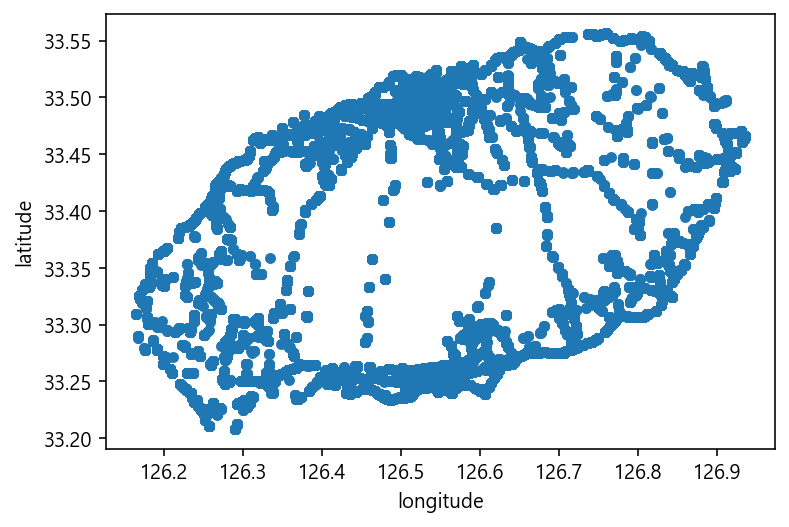

In [100]:
df_in_map[["latitude", "longitude"]].plot.scatter(x="longitude",y="latitude")

In [101]:
df_out_map = df_out[columns].copy()

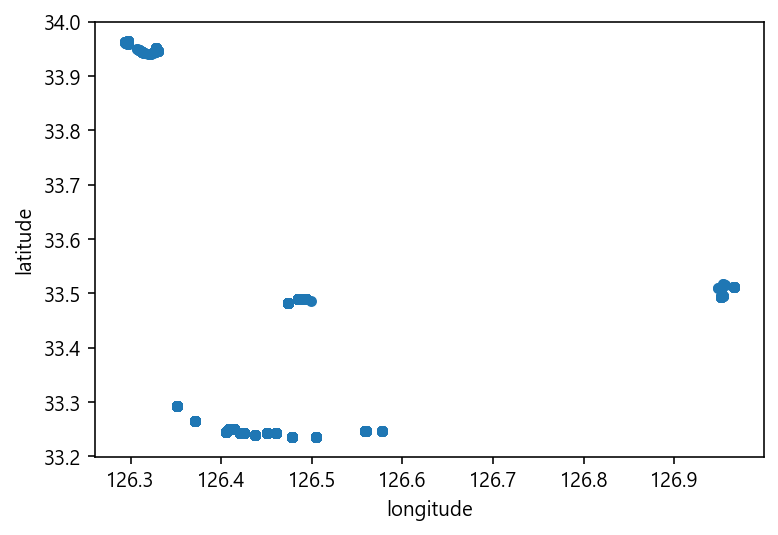

In [102]:
df_out_map[["latitude", "longitude"]].plot.scatter(x="longitude",y="latitude")

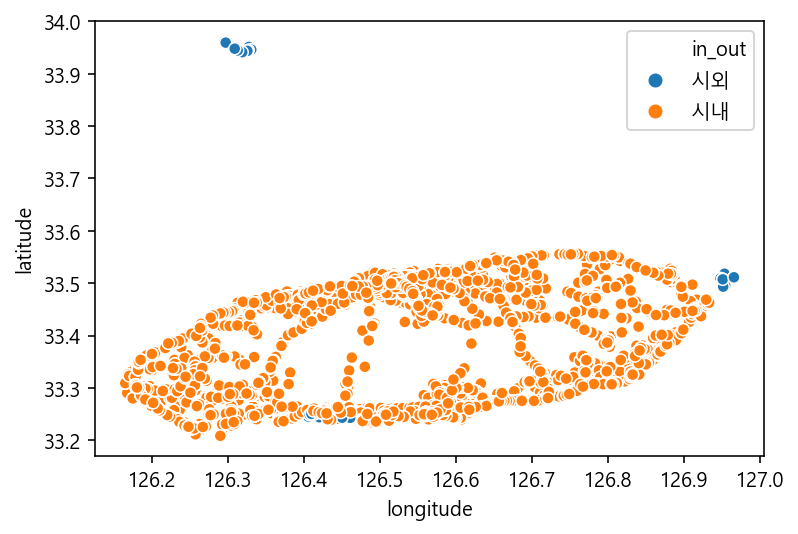

In [103]:
sns.scatterplot(data=df, x="longitude",y="latitude", hue="in_out")

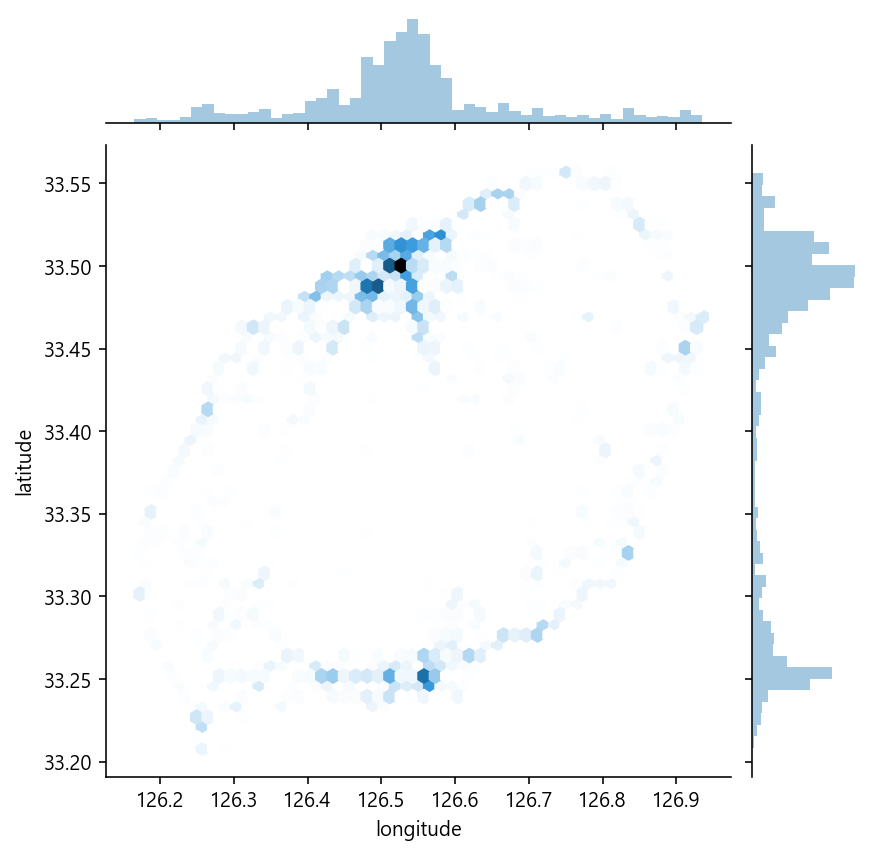

In [104]:
sns.jointplot(data=df_in,  x="longitude",y="latitude", kind="hex")

In [105]:
columns_ride = [ 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride']

In [106]:
columns_off = [ 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff']

## 시내/승차한 사람에 대한 데이터

In [107]:
df_in_ride = df_in[columns_ride].copy()
df_in_ride.head(2)

,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride
3,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0
4,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0


## 시내/승차한 사람에 대한 데이터 melt를 이용해 ride 열들을 ride_time columns로 합쳐 가져오기

In [125]:
df_in_ride_melt = df_in_ride.melt(id_vars = ["in_out","station_code","station_name", "latitude","longitude"],var_name="ride_time",value_name="Passengers")
df_in_ride_melt.head()

,in_out,station_code,station_name,latitude,longitude,ride_time,Passengers
0,시내,1579,제주국제공항(600번),33.50577,126.49252,6~7_ride,1.0
1,시내,1636,롯데호텔,33.24872,126.41032,6~7_ride,0.0
2,시내,1646,중문관광단지입구,33.25579,126.41260,6~7_ride,0.0
3,시내,1648,예래입구,33.25862,126.40442,6~7_ride,0.0
4,시내,1943,켄싱턴리조트악근천,33.23440,126.49043,6~7_ride,0.0


## 시외/승차한 사람에 대한 데이터

In [109]:
df_in_off = df_out[columns_off].copy()
df_in_off.head(2)

,in_out,station_code,station_name,latitude,longitude,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,시외,344,제주썬호텔,33.48990,126.49373,0.0,0.0,0.0,0.0,0.0,1.0
1,시외,357,한라병원,33.48944,126.48508,0.0,0.0,0.0,0.0,0.0,0.0


## 시외/승차한 사람에 대한 데이터 melt를 이용해 ride 열들을 ride_time columns로 합쳐 가져오기

In [113]:
df_in_off_melt = df_in_off.melt(id_vars = ["in_out","station_code","station_name", "latitude","longitude"],var_name="takeoff_time",value_name="Passengers")
df_in_off_melt.head()

,in_out,station_code,station_name,latitude,longitude,takeoff_time,Passengers
0,시외,344,제주썬호텔,33.48990,126.49373,6~7_takeoff,0.0
1,시외,357,한라병원,33.48944,126.48508,6~7_takeoff,0.0
2,시외,432,정존마을,33.48181,126.47352,6~7_takeoff,0.0
3,시외,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,6~7_takeoff,0.0
4,시외,1662,씨에스호텔,33.24362,126.42032,6~7_takeoff,0.0


In [114]:
import folium

In [115]:
lat_in = df_in["latitude"].mean()
long_in = df_in["longitude"].mean()
lat_in, long_in

(33.41952123996276, 126.5348285792487)

In [116]:
# 샘플 하나 찍어보기
m = folium.Map([lat_in, long_in])
# 127.039032	37.495593
folium.Marker(
    [33.41952123996276, 126.5348285792487], 
    popup='<i>Hello</i>', 
    tooltip="WooooW").add_to(m)
m.save('index.html')
m

In [250]:
df_in_ride_melt.head(10)

,in_out,station_code,station_name,latitude,longitude,ride_time,Passengers
0,시내,1579,제주국제공항(600번),33.50577,126.49252,6~7_ride,1.0
1,시내,1636,롯데호텔,33.24872,126.41032,6~7_ride,0.0
2,시내,1646,중문관광단지입구,33.25579,126.41260,6~7_ride,0.0
3,시내,1648,예래입구,33.25862,126.40442,6~7_ride,0.0
4,시내,1943,켄싱턴리조트악근천,33.23440,126.49043,6~7_ride,0.0
5,시내,2008,서귀포항,33.23977,126.56450,6~7_ride,0.0
6,시내,2013,신라호텔,33.24775,126.40793,6~7_ride,0.0
7,시내,2494,동광환승정류장5(서귀방면),33.30958,126.34083,6~7_ride,0.0
8,시내,2843,중문관광단지여미지식물원입구,33.25214,126.41268,6~7_ride,0.0
9,시내,2851,제주월드컵경기장(600번),33.24911,126.50907,6~7_ride,0.0


In [251]:
df_in_ride_melt_1 = df_in_ride_melt.drop(['in_out','station_code'],axis=1)
df_in_ride_melt_1.head(10)

,station_name,latitude,longitude,ride_time,Passengers
0,제주국제공항(600번),33.50577,126.49252,6~7_ride,1.0
1,롯데호텔,33.24872,126.41032,6~7_ride,0.0
2,중문관광단지입구,33.25579,126.41260,6~7_ride,0.0
3,예래입구,33.25862,126.40442,6~7_ride,0.0
4,켄싱턴리조트악근천,33.23440,126.49043,6~7_ride,0.0
5,서귀포항,33.23977,126.56450,6~7_ride,0.0
6,신라호텔,33.24775,126.40793,6~7_ride,0.0
7,동광환승정류장5(서귀방면),33.30958,126.34083,6~7_ride,0.0
8,중문관광단지여미지식물원입구,33.25214,126.41268,6~7_ride,0.0
9,제주월드컵경기장(600번),33.24911,126.50907,6~7_ride,0.0


## 실제로 탄 승객에 대해서만 데이터 추출

In [252]:
df_in_ride_melt_1 = df_in_ride_melt_1[df_in_ride_melt_1["Passengers"]>0]

In [253]:
df_in_ride_melt_1.head(10)

,station_name,latitude,longitude,ride_time,Passengers
0,제주국제공항(600번),33.50577,126.49252,6~7_ride,1.0
16,중문관광단지입구,33.25593,126.41262,6~7_ride,2.0
18,창천리,33.26541,126.37153,6~7_ride,1.0
19,강정초등학교,33.23564,126.48010,6~7_ride,5.0
21,서귀포항,33.23988,126.56422,6~7_ride,2.0
24,중문관광단지여미지식물원입구,33.25170,126.41264,6~7_ride,1.0
25,제주월드컵경기장(600번),33.24934,126.50904,6~7_ride,2.0
28,서복전시관,33.24519,126.57018,6~7_ride,1.0
32,제주도청신제주로터리,33.49110,126.49647,6~7_ride,2.0
34,제주시외버스터미널,33.49946,126.51479,6~7_ride,10.0


In [254]:
df_in_ride_melt_sample= df_in_ride_melt_1.sample(1000)

In [255]:
df_in_ride_melt_sample.index

Int64Index([ 860379,  828524,  546546,  915760, 1022847,  728525,  676900,
             297927, 1166405,  243519,
            ...
            1083312, 1096675,  871324,  549349,  237825,  628081,  608834,
             531655,  256294,  673365],
           dtype='int64', length=1000)

In [256]:
df_in_ride_melt_sample.head()

,station_name,latitude,longitude,ride_time,Passengers
860379,던덕모롤,33.46240,126.40838,9~10_ride,2.0
828524,천수동,33.50847,126.54190,9~10_ride,4.0
546546,제주버스터미널,33.49993,126.51486,8~9_ride,2.0
915760,화북초등학교,33.51762,126.56172,10~11_ride,1.0
1022847,삼양검문소,33.52102,126.60003,10~11_ride,1.0


In [257]:
df_in_ride_melt_sample.index

Int64Index([ 860379,  828524,  546546,  915760, 1022847,  728525,  676900,
             297927, 1166405,  243519,
            ...
            1083312, 1096675,  871324,  549349,  237825,  628081,  608834,
             531655,  256294,  673365],
           dtype='int64', length=1000)

## int 자료형은 title에 못들어가니까 str로 변환 / 실제로 그려보기

In [258]:
df_in_ride_melt_sample["Passengers"] = df_in_ride_melt_sample["Passengers"].apply(str)

In [259]:
df_in_ride_melt_sample["ride_time"] = df_in_ride_melt_sample["ride_time"].str.replace("_ride","시")

In [260]:
df_in_ride_melt_sample["Passengers"] = df_in_ride_melt_sample["Passengers"].str.replace(".0", "")

In [261]:
df_in_ride_melt_sample.head(2)

,station_name,latitude,longitude,ride_time,Passengers
860379,던덕모롤,33.46240,126.40838,9~10시,2
828524,천수동,33.50847,126.54190,9~10시,4


In [263]:
m = folium.Map([lat_in, long_in], zoom_start=12, titles="Passengers for JeJu")

marker_cluster = MarkerCluster().add_to(m)

for i in df_in_ride_melt_sample.index:
    sub_lat = df_in_ride_melt_sample.loc[i, "latitude"]
    sub_long = df_in_ride_melt_sample.loc[i, "longitude"]
    
    title = df_in_ride_melt_sample.loc[i, "station_name"] + " >> " + df_in_ride_melt_sample.loc[i, "ride_time"] + " >> " + df_in_ride_melt_sample.loc[i, "Passengers"] + "명"


    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=5,
        color="blue",
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m.save('JeJu-tour.html')
m